In [1]:
%load_ext lab_black

In [2]:
import math
import collections
import random

from matplotlib import pyplot as plt

In [3]:
def normal_pdf(x, mu=0, sigma=1):

    numerator = math.exp(-(1 / 2) * ((x - mu) / sigma) ** 2)
    denominator = sigma * math.sqrt(2 * math.pi)

    return numerator / denominator

In [4]:
def make_integral_table(f, a, b, n_steps):

    dx = (b - a) / n_steps

    table = collections.OrderedDict()
    cum_area = 0

    x = a
    table[x] = cum_area

    while x < b:
        next_x = x + dx
        midpoint = (x + next_x) / 2
        height = f(midpoint)
        area = height * dx
        cum_area += area
        table[next_x] = cum_area
        x = next_x

    return table

In [5]:
def integrate(f, a, b, n_steps):

    table = make_integral_table(f, a, b, n_steps)

    def f_integrated(x):

        last_k = None
        for current_k in table.keys():

            if current_k > x:
                break
            last_k = current_k

        return table.get(last_k, 0)

    return f_integrated

In [6]:
def make_psuedo_inverse_table(f, a, b, n_steps):

    dx = (b - a) / n_steps

    table = collections.OrderedDict()

    x = a
    table[f(x)] = x

    while x < b:
        next_x = x + dx
        table[f(next_x)] = next_x
        x = next_x

    return table

In [7]:
def psuedo_invert(f, a, b, n_steps):

    table = make_psuedo_inverse_table(f, a, b, n_steps)

    def f_inverted(x):
        last_k = None
        for current_k in table.keys():

            if current_k > x:
                break
            last_k = current_k

        return table[last_k] if table[last_k] < b else b

    return f_inverted

In [8]:
def create_random_variable(cdf, a, b, n_steps):

    inverse_cdf = psuedo_invert(cdf, a, b, n_steps)

    def random_variable():

        return inverse_cdf(random.random())

    return random_variable

In [9]:
normal_cdf = integrate(normal_pdf, -10, 10, 10_000)

In [10]:
inverse_normal_cdf = psuedo_invert(normal_cdf, -10, 10, 10_000)

In [11]:
inverse_normal_cdf(0)

-10

In [12]:
inverse_normal_cdf(1)

10

In [13]:
normal_random_variable = create_random_variable(normal_cdf, -10, 10, 10_000)

In [14]:
normal_random_variable()

0.7800000000000088

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 5.000e+00, 8.000e+00, 1.200e+01, 1.700e+01,
        1.500e+01, 3.000e+01, 4.600e+01, 5.800e+01, 6.200e+01, 7.700e+01,
        1.190e+02, 1.440e+02, 1.420e+02, 2.520e+02, 2.500e+02, 3.370e+02,
        4.160e+02, 4.510e+02, 5.410e+02, 6.760e+02, 8.200e+02, 9.050e+02,
        1.128e+03, 1.279e+03, 1.441e+03, 1.623e+03, 1.790e+03, 1.955e+03,
        2.252e+03, 2.465e+03, 2.738e+03, 2.776e+03, 2.877e+03, 3.274e+03,
        3.422e+03, 3.326e+03, 3.469e+03, 3.598e+03, 3.755e+03, 3.702e+03,
        3.723e+03, 3.604e+03, 3.533e+03, 3.549e+03, 3.279e+03, 3.191e+03,
        2.883e+03, 2.705e+03, 2.559e+03, 2.434e+03, 2.234e+03, 2.014e+03,
        1.713e+03, 1.516e+03, 1.399e+03, 1.170e+03, 1.090e+03, 8.980e+02,
        8.010e+02, 6.330e+02, 5.410e+02, 4.310e+02, 3.670e+02, 3.020e+02,
        2.600e+02, 1.890e+02, 1.770e+02, 1.380e+02, 1.050e+02, 7.800e+01,
        6.900e+01, 4.200e+01, 2.100e+0

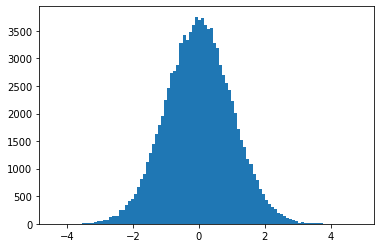

In [15]:
plt.hist([normal_random_variable() for _ in range(100_000)], bins=100)